In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


school - Escuela(Binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)<br>
sex - Sexo (Binario: 'F' - Femenino  o 'M' - Masculino)<br>
age - Edad del estudiante (Numerico: desde 15 a 22)<br>
address - Tipo de urbanizacion (student's home address type )(Binario: 'U' - uroban o 'R' - rural)<br>
famsize - Tamaño de familia (Binario: 'LE3' - Menor o igual a 3 or 'GT3' - Mayor a  3)<br>
Pstatus - Estado de convivencia de los padres(Binario: 'T' - Vivir Juntos o 'A' - Aparte)<br>
Medu -Educacion de la Madre (Numerico: 0 - Nada, 1 - Educacion primaria (4th grado), 2 – 5th to 9th grado, 3 – Educacion Secudnaria or 4 – Educacion mas alta)<br>
Fedu - father's education (Numerico: 0 - Nada, 1 - Educacion primaria(4th grado), 2 – 5th to 9th grado, 3 – Educacion Secudnaria or 4 – Educacion mas alta)<br>
Mjob - Trabajo de la madre (Categorico: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - Trabajo del padre(Categorico: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - Razon para elegir esta escuela (Categorico: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - Tutor del estudiante(Categorico: 'mother', 'father' or 'other')<br>
traveltime -Tiempo de distancia a la escuela (Numerico: 1 - 1 hora)<br>
studytime - Tiempo de estudio entre semana (Numerico: 1 - 10 horas)<br>
failures - number of past class failures (Numerico: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (Binario: yes or no)<br>
famsup - family educational support (Binario: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) <br>(Binario: yes or no)
activities - extra-curricular activities (Binario: yes or no)<br>
nursery - attended nursery school (Binario: yes or no)<br>
higher - wants to take higher education (Binario: yes or no)<br>
internet - Internet access at home (Binario: yes or no)<br>
romantic - with a romantic relationship (Binario: yes or no)<br>
famrel - quality of family relationships (Numerico: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (Numerico: from 1 - very low to 5 - very high)<br>
goout - going out with friends (Numerico: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (Numerico: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (Numerico: from 1 - very low to 5 - very high)<br>
health - current health status (Numerico: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (Numerico: from 0 to 93)<br>
These grades are related with the course subject, Math or Portuguese:<br>

G1 - first period grade (Numerico: from 0 to 20)<br>
G2 - second period grade (Numerico: from 0 to 20)<br>
G3 - final grade (Numerico: from 0 to 20, output target)<br>

In [2]:
Mat_dataset = pd.read_csv("student-mat.csv")
Mat_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
Por_dataset = pd.read_csv("student-por.csv")
Por_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


# EDA

## Preprocesando datos

In [4]:
Mat_dataset_pp= Mat_dataset.iloc[:,:].values
Mat_dataset_pp

array([['GP', 'F', 18, ..., 5, 6, 6],
       ['GP', 'F', 17, ..., 5, 5, 6],
       ['GP', 'F', 15, ..., 7, 8, 10],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [5]:
column= [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for i in column:
  le_X = preprocessing.LabelEncoder()
  Mat_dataset_pp[:,i] = le_X.fit_transform(Mat_dataset_pp[:,i])


In [6]:
Mat_dataset_pp


array([[0, 0, 18, ..., 5, 6, 6],
       [0, 0, 17, ..., 5, 5, 6],
       [0, 0, 15, ..., 7, 8, 10],
       ...,
       [1, 1, 21, ..., 10, 8, 7],
       [1, 1, 18, ..., 11, 12, 10],
       [1, 1, 19, ..., 8, 9, 9]], dtype=object)

In [7]:
Por_dataset_pp= Por_dataset.iloc[:,:].values
Por_dataset_pp

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'F', 18, ..., 11, 12, 9],
       ['MS', 'M', 17, ..., 10, 10, 10],
       ['MS', 'M', 18, ..., 10, 11, 11]], dtype=object)

In [8]:
column= [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for i in column:
  le_X = preprocessing.LabelEncoder()
  Por_dataset_pp[:,i] = le_X.fit_transform(Por_dataset_pp[:,i])

In [9]:
Por_dataset_pp

array([[0, 0, 18, ..., 0, 11, 11],
       [0, 0, 17, ..., 9, 11, 11],
       [0, 0, 15, ..., 12, 13, 12],
       ...,
       [1, 0, 18, ..., 11, 12, 9],
       [1, 1, 17, ..., 10, 10, 10],
       [1, 1, 18, ..., 10, 11, 11]], dtype=object)

# Clustering

## Matematicas

In [10]:
Mat_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


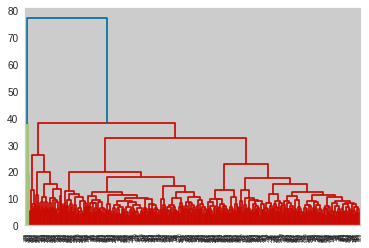

In [11]:
M = sch.linkage(Mat_dataset_pp, method='complete', metric='euclidean')
sch.dendrogram(M)
plt.show()

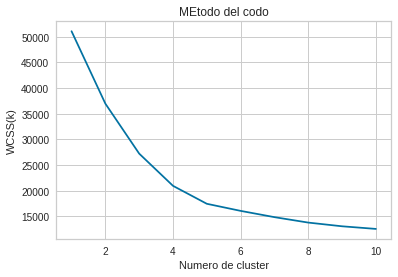

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Mat_dataset_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("MEtodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

AttributeError: ignored

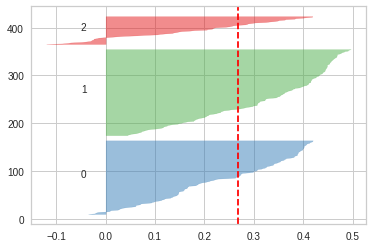

In [13]:
model = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model.fit(Mat_dataset_pp)        
model.show()

AttributeError: ignored

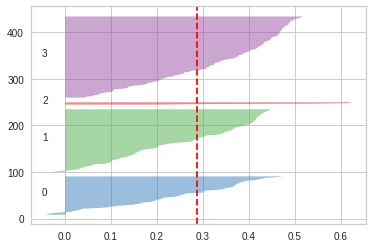

In [14]:
model = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model.fit(Mat_dataset_pp)        
model.show()

AttributeError: ignored

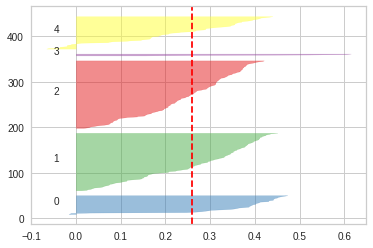

In [15]:
model = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model.fit(Mat_dataset_pp)        
model.show()

AttributeError: ignored

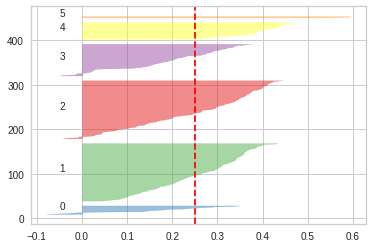

In [16]:
model = SilhouetteVisualizer(KMeans(6, random_state=42), colors='yellowbrick')
model.fit(Mat_dataset_pp)        
model.show()

In [17]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Mat_dataset_pp)
y_kmeans

array([1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       3, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 0, 0, 1, 0, 1, 1, 1, 0,
       3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1,
       3, 3, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 0, 0, 0, 3,
       3, 1, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 1, 1,
       1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 0,
       1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 1, 0, 1,
       1, 0, 1, 3, 3, 1, 3, 0, 0, 0, 1, 0, 2, 3, 3, 3, 3, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 3, 0, 0, 3,

In [18]:
centroids_math  = kmeans.cluster_centers_
centroids_math = centroids_math.round()
CentroidsmathDF = pd.DataFrame(centroids_math)
CentroidsmathDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,16.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,3.0,14.0,14.0,14.0
1,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,8.0,7.0,6.0
2,0.0,0.0,18.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,4.0,53.0,10.0,10.0,9.0
3,0.0,0.0,17.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,15.0,10.0,10.0,10.0


## Portugues

In [19]:
Por_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


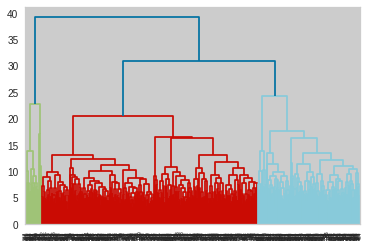

In [20]:
P = sch.linkage(Por_dataset_pp, method='complete', metric='euclidean')
sch.dendrogram(P)
plt.show()

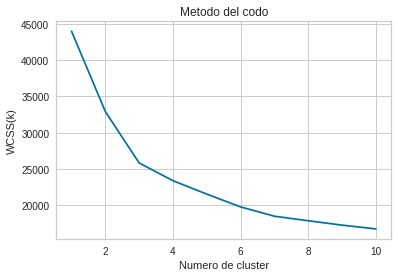

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Por_dataset_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

AttributeError: ignored

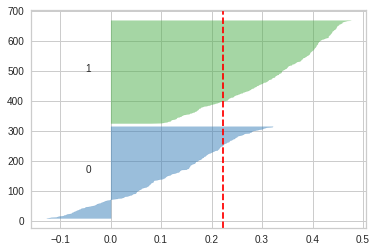

In [22]:
model = SilhouetteVisualizer(KMeans(2, random_state=42), colors='yellowbrick')
model.fit(Por_dataset_pp)        
model.show()

AttributeError: ignored

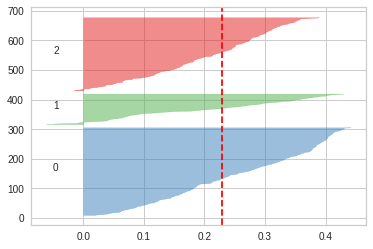

In [23]:
model = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model.fit(Por_dataset_pp)        
model.show()

AttributeError: ignored

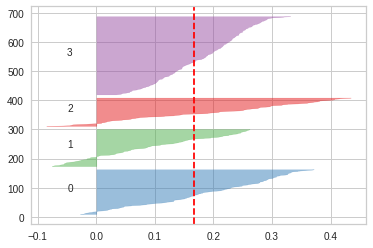

In [24]:
model = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model.fit(Por_dataset_pp)        
model.show()

AttributeError: ignored

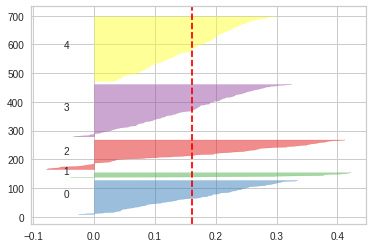

In [25]:
model = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model.fit(Por_dataset_pp)        
model.show()

In [26]:
kmeans_por = KMeans(n_clusters = 3, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
Por_y_kmeans = kmeans_por.fit_predict(Por_dataset_pp)
Por_y_kmeans

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0,

In [27]:
centroids_por  = kmeans_por.cluster_centers_
centroids_por = centroids_math.round()
CentroidsporDF = pd.DataFrame(centroids_por)
CentroidsporDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,16.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,3.0,14.0,14.0,14.0
1,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,8.0,7.0,6.0
2,0.0,0.0,18.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,4.0,53.0,10.0,10.0,9.0
3,0.0,0.0,17.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,15.0,10.0,10.0,10.0


## Juntos

In [28]:
frames = [Por_dataset, Mat_dataset]
dt_def = pd.concat(frames)

In [29]:
dt_def

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [30]:
dt_def_pp = dt_def.iloc[:,:].values
dt_def_pp

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'M', 21, ..., 10, 8, 7],
       ['MS', 'M', 18, ..., 11, 12, 10],
       ['MS', 'M', 19, ..., 8, 9, 9]], dtype=object)

In [31]:
column= [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for i in column:
  le_X = preprocessing.LabelEncoder()
  dt_def_pp[:,i] = le_X.fit_transform(dt_def_pp[:,i])

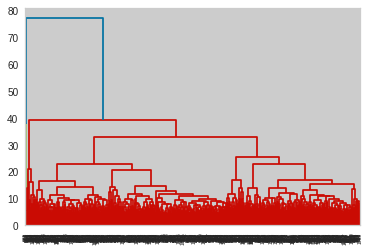

In [32]:
defi = sch.linkage(dt_def_pp, method='complete', metric='euclidean')
sch.dendrogram(defi)
plt.show()

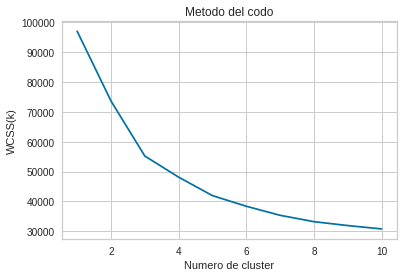

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dt_def_pp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metodo del codo")
plt.xlabel("Numero de cluster")
plt.ylabel("WCSS(k)")
plt.show()

AttributeError: ignored

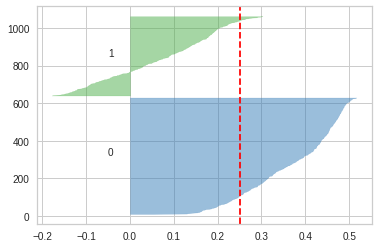

In [34]:
model = SilhouetteVisualizer(KMeans(2, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

AttributeError: ignored

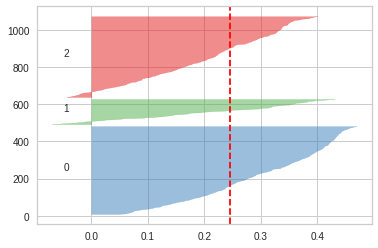

In [35]:
model = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

AttributeError: ignored

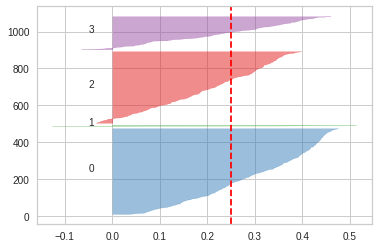

In [36]:
model = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

AttributeError: ignored

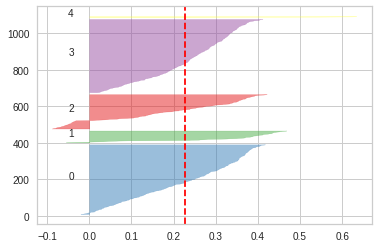

In [37]:
model = SilhouetteVisualizer(KMeans(5, random_state=42), colors='yellowbrick')
model.fit(dt_def_pp)        
model.show()

In [38]:
kmeans_def = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
Def_y_kmeans = kmeans_def.fit_predict(dt_def_pp)
Def_y_kmeans

array([3, 3, 0, ..., 3, 3, 3], dtype=int32)

In [40]:
centroids_def  = kmeans.cluster_centers_
centroids_def = centroids_math.round()
CentroidsdefDF = pd.DataFrame(centroids_def)
CentroidsdefDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,1.0,16.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,3.0,14.0,14.0,14.0
1,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,8.0,7.0,6.0
2,0.0,0.0,18.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,4.0,53.0,10.0,10.0,9.0
3,0.0,0.0,17.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,15.0,10.0,10.0,10.0
